In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':[5,5]}, font_scale=1.2)

In [3]:
train = pd.read_csv('Customer Churn\customer_churn_dataset-training-master.csv')
test = pd.read_csv('Customer Churn\customer_churn_dataset-testing-master.csv')
data = pd.concat([train, test], axis=0)
data = data.reset_index(drop=True)

In [4]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [5]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# Age Churn relationship


<Axes: xlabel='Churn', ylabel='Age'>

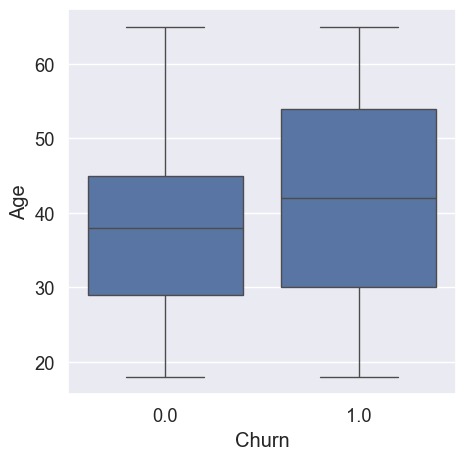

In [6]:
sns.boxplot(x='Churn', y='Age', data=data)

In [7]:
#Divide the Age column into different categories
bins=[18,25,35,45,70]
labels = ['18-25','25-35','35-45','45+']
data['AgeCat'] = pd.cut(data['Age'], bins=bins, labels=labels)
AgeChurnRate = data.groupby('AgeCat',observed=True)['Churn'].mean()
AgeChurnRate

AgeCat
18-25    0.541062
25-35    0.485770
35-45    0.429825
45+      0.700488
Name: Churn, dtype: float64

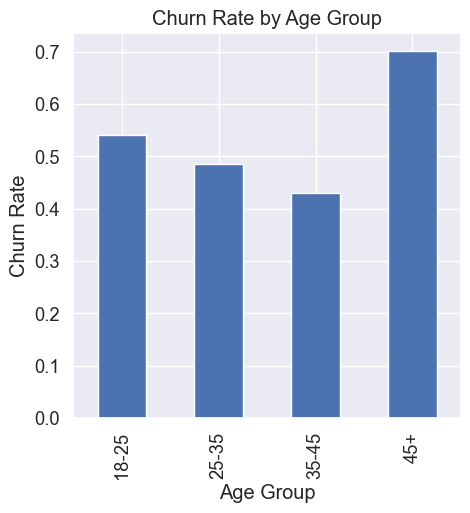

In [8]:
AgeChurnRate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.title('Churn Rate by Age Group')
plt.show()

In [9]:
data.groupby('AgeCat', observed=True)['Churn'].count()


AgeCat
18-25     74533
25-35    117150
35-45    131556
45+      172474
Name: Churn, dtype: int64

Analysis of customer age reveals a clear pattern in churn behavior:
--
Customers aged 35–45 exhibit the lowest churn rate, indicating higher loyalty and stability.

Younger customers (18–25) show a moderate churn rate, likely reflecting experimentation and sensitivity to offers or pricing.

Customers aged 45 and above have the highest churn rate, highlighting a high-risk segment that may benefit from targeted retention strategies.

By grouping age into meaningful categories, this feature can be effectively used in predictive modeling, providing both strong interpretability and actionable business insights.”

# Gender Churn Relationship

In [10]:
GndChrn = data.groupby('Gender',observed=True)['Churn'].value_counts(normalize=True).unstack()*100
GndChrn

Churn,0.0,1.0
Gender,,
Female,35.105565,64.894435
Male,52.002869,47.997131


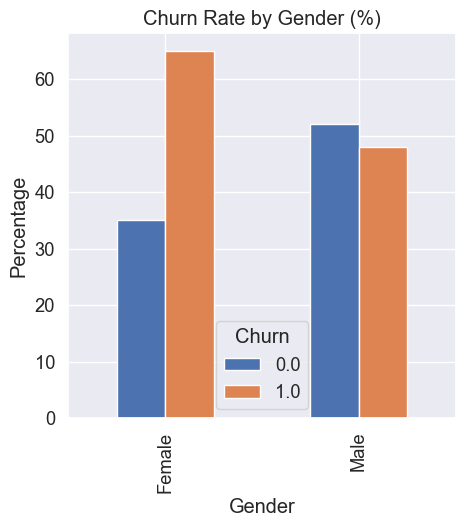

In [11]:
GndChrn.plot(kind='bar')
plt.title('Churn Rate by Gender (%)')
plt.ylabel('Percentage')
plt.show()

In [12]:
data['Gender'].value_counts()

Gender
Male      280273
Female    224933
Name: count, dtype: int64

Analysis of customer gender reveals a clear pattern in churn behavior:
---
According to 57% of males and 43% of females, the ratio between males and females is balanced. 

Female customers exhibit a substantially higher churn rate (approximately 66.7%), making them the highest-risk segment in this category. 

Gender is a highly discriminative feature for this predictive model. The stark difference in churn behavior indicates that gender-specific retention strategies—such as personalized marketing or tailored loyalty programs—could be highly effective in Prediction modeling."

# Tenure Churn Relationship (How long the customer has been with the company)

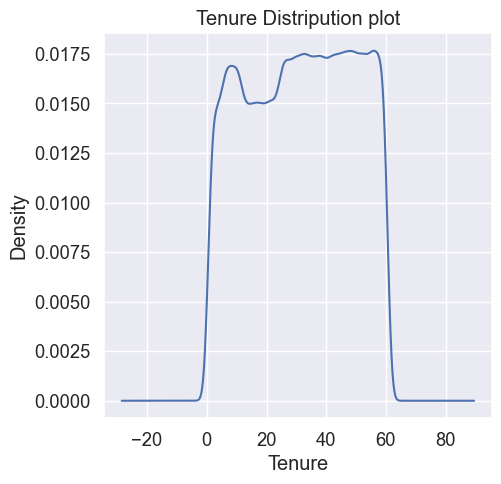

In [13]:
data['Tenure'].plot(kind='kde')
plt.title('Tenure Distripution plot')
plt.xlabel('Tenure')
plt.show()

In [14]:
#Divide the Tenure column into different categories
Tbins = [0,3,12,24,60]
Tlabels = ['Short-term', 'Medium-term', 'Long-term', 'Loyalist']
data['TenureCat'] = pd.cut(data['Tenure'], bins=Tbins, labels=Tlabels)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term


In [15]:
TenureChurnRate = data.groupby('TenureCat', observed=True )['Churn'].mean()
TenureChurnRate

TenureCat
Short-term     0.607283
Medium-term    0.540205
Long-term      0.593322
Loyalist       0.544104
Name: Churn, dtype: float64

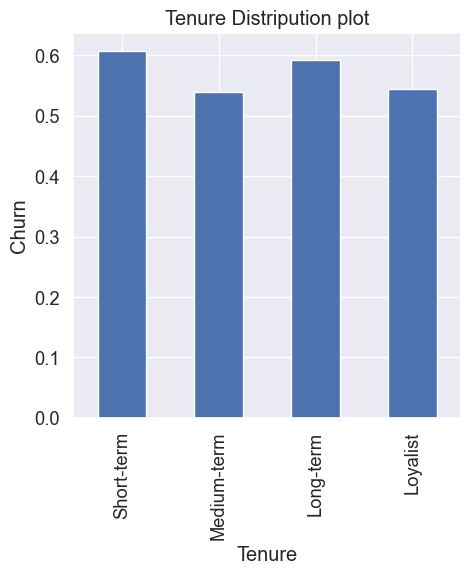

In [16]:
TenureChurnRate.plot(kind='bar')
plt.title('Tenure Distripution plot')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

In [17]:
data['Contract Length'].value_counts()

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

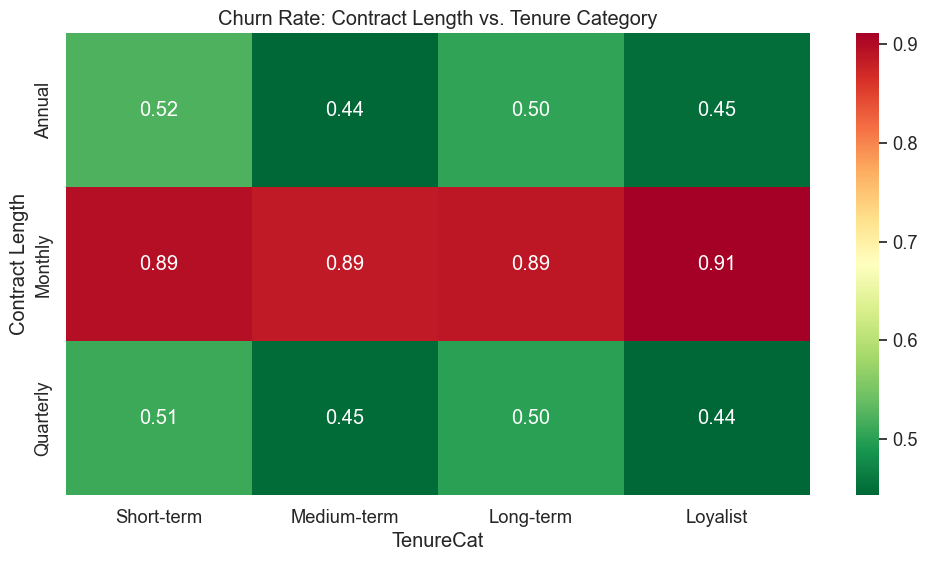

In [18]:
pivot_table = data.pivot_table(index='Contract Length', 
                             columns='TenureCat', 
                             values='Churn', 
                             aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn_r', fmt='.2f')
plt.title('Churn Rate: Contract Length vs. Tenure Category')
plt.show()

Analysis of customer Tenure reveals a clear pattern in churn behavior:
---
Critical Onboarding: Highest churn (64.5%) among new customers, showing early retention issues.

2-Year Spike: Secondary churn peak (63.3%) around 2-year contracts, likely due to contract expirations.

Late-Stage Stability: Churn drops to 54.2% for loyal customers.

Modeling Value: Tenure is a key feature, revealing risk windows and its non-linear relation with churn.

# Usage Frequency Churn Relationship (How long the customer has been with the company)

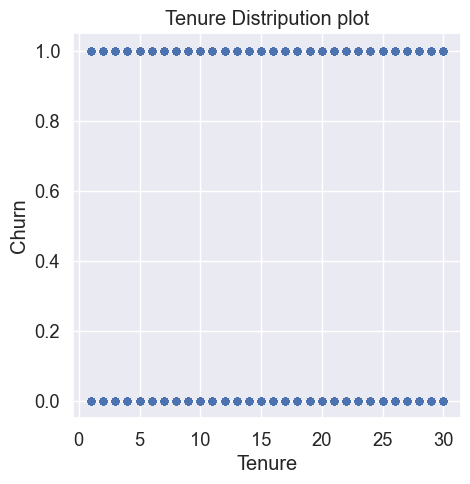

In [19]:
data.plot(x= 'Usage Frequency',y= 'Churn',kind='scatter')
plt.title('Tenure Distripution plot')
plt.xlabel('Tenure')
plt.show()

<Axes: xlabel='Churn', ylabel='Usage Frequency'>

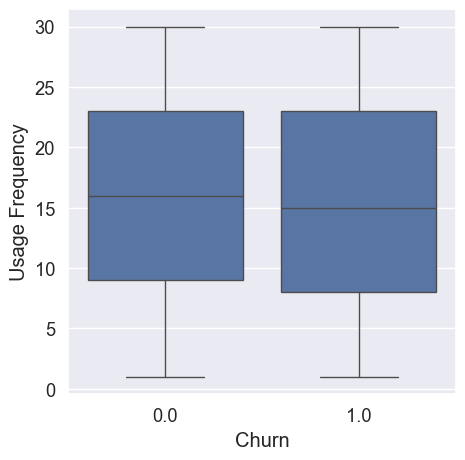

In [20]:
sns.boxplot(y= 'Usage Frequency',x= 'Churn', data=data)

In [21]:
bins = [0,1,5,10,30]
labels = ['once of use', '5 times usege', '10 time usege', 'a lot of usege']
data['useg Cat'] = pd.cut(data['Usage Frequency'], bins=bins, labels=labels)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege


In [22]:
UsegeFreqCat = data.groupby('useg Cat', observed=True)['Churn'].value_counts(normalize=True).unstack()
UsegeFreqCat

Churn,0.0,1.0
useg Cat,,
once of use,0.370522,0.629478
5 times usege,0.382895,0.617105
10 time usege,0.423140,0.576860
a lot of usege,0.465020,0.534980


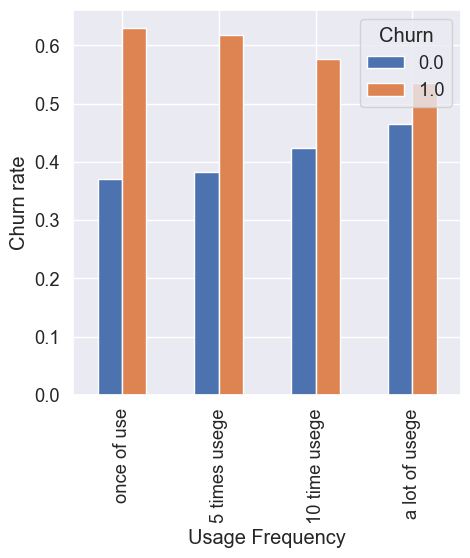

In [23]:
UsegeFreqCat.plot(kind='bar')
plt.ylabel('Churn rate')
plt.xlabel('Usage Frequency')
plt.show()

Insights: Usage Frequency vs. Churn
----
Inverse Relationship: Churn probability decreases as service usage increases, confirming that higher engagement drives retention.

High-Risk Segment: Low-frequency users ("Once of use") exhibit the highest churn rate at 61.7%, signaling a lack of perceived value or poor onboarding.

Engagement Buffer: Heavy users ("A lot of usage") are the most stable group, with churn dropping to 54.9%.

Strategic Opportunity: Even among heavy users, churn remains above 50%, suggesting that while usage helps, external factors like pricing or competitors still play a significant role.

# Support Calls Churn Relationship

In [24]:
bins = [0,1,10]
labels = ['one call', 'Multiple Calls']
data['SupportCallsCat'] = pd.cut(data['Support Calls'], bins=bins, labels=labels)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls


In [25]:
SupportCallsCat = data.groupby('SupportCallsCat', observed=True)['Churn'].value_counts(normalize=True).unstack()
SupportCallsCat

Churn,0.0,1.0
SupportCallsCat,,
one call,0.701324,0.298676
Multiple Calls,0.337266,0.662734


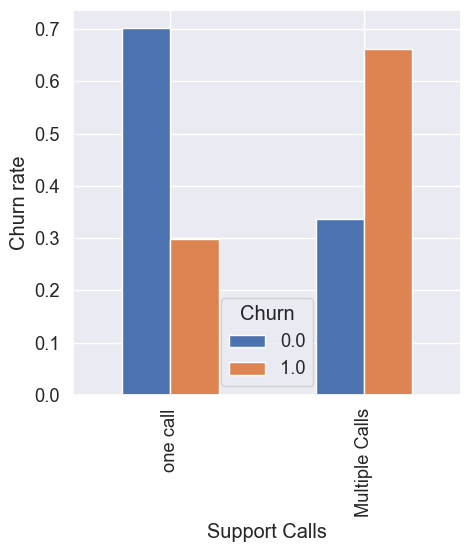

In [26]:
SupportCallsCat.plot(kind='bar')
plt.ylabel('Churn rate')
plt.xlabel('Support Calls')
plt.show()

In [27]:
data['Support Calls'].value_counts()

Support Calls
0.0     74842
1.0     74405
2.0     71383
3.0     57452
4.0     43898
5.0     31575
10.0    30487
7.0     30469
9.0     30294
8.0     30208
6.0     30193
Name: count, dtype: int64

In [28]:
data['Support Calls'] = data['Support Calls'].clip(upper=6)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls
1,3.0,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls
3,5.0,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls
505204,64372.0,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls
505205,64373.0,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls


In [29]:
data['Support Calls'].value_counts()

Support Calls
6.0    151651
0.0     74842
1.0     74405
2.0     71383
3.0     57452
4.0     43898
5.0     31575
Name: count, dtype: int64

Insights: Support Calls vs. Churn
----
Threshold Consolidation: Capping Support Calls at 6.0 has created a significant "High-Risk Bucket" of 118,513 customers. This effectively groups all extreme technical friction cases into a single predictive category.

Non-Linear Risk Capture: This transformation helps the Logistic Regression model focus on the critical escalation point (3 to 6 calls) rather than getting lost in the variance of extreme outliers (7–10 calls).

Model Sensitivity: The model will now be highly sensitive to any customer exceeding 3 calls, as the weight of the "6.0" group will dominate the probability calculation for technical churn.

# Payment Delay Churn Relationship

In [30]:
bins = [0,1,15,30]
labels = ['On_Time', 'Late', 'Very_Late']
data['PaymentDelayCat'] = pd.cut(data['Payment Delay'], bins=bins, labels=labels)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat,PaymentDelayCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls,Very_Late
1,3.0,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls,Late
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls,Very_Late
3,5.0,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls,Late
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls,Very_Late
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls,Very_Late
505204,64372.0,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Very_Late
505205,64373.0,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls,Very_Late


In [31]:
PaymentDelayCat = data.groupby('PaymentDelayCat', observed=True)['Churn'].value_counts(normalize=True).unstack()
PaymentDelayCat

Churn,0.0,1.0
PaymentDelayCat,,
On_Time,0.572198,0.427802
Late,0.565091,0.434909
Very_Late,0.272570,0.727430


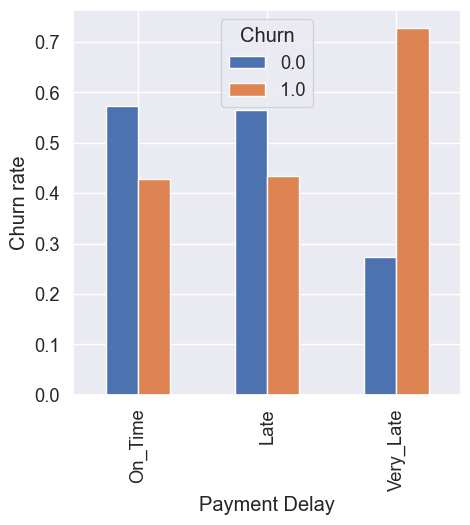

In [32]:
PaymentDelayCat.plot(kind='bar')
plt.ylabel('Churn rate')
plt.xlabel('Payment Delay')
plt.show()

Insights: Payment Delay vs. Churn Behavior
-----
The Threshold Effect: Churn remains stable (~46%) for both on-time and slightly late payments. However, it spikes dramatically to 73.1% once the delay enters the Very_Late category.

Psychological Commitment: Customers who are slightly late are still engaged. The "Very_Late" status acts as a definitive behavioral signal that the customer has likely abandoned the service.

Predictive Value: This feature serves as a high-impact categorical predictor. In a Logistic Regression model, the Very_Late coefficient will be a dominant factor in flagging high-risk accounts.

# Subscription Type Churn Relationship

In [33]:
SubscriptionTypeCat = data.groupby('Subscription Type', observed=True)['Churn'].value_counts().unstack()
SubscriptionTypeCat


Churn,0.0,1.0
Subscription Type,,
Basic,70911,93566
Premium,76966,93133
Standard,76837,93793


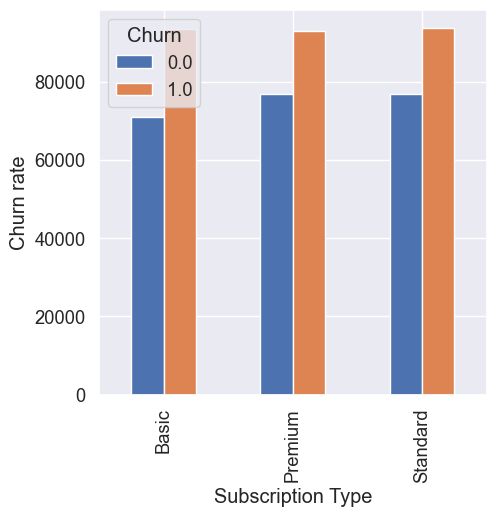

In [34]:
SubscriptionTypeCat.plot(kind='bar')
plt.ylabel('Churn rate')
plt.xlabel('Subscription Type')
plt.show()

Insights: Subscription Type vs. Churn
----
Uniform Risk Distribution: Churn rates are remarkably consistent across all subscription tiers (~83k churned users per category). No specific plan (Basic, Standard, or Premium) shows a natural advantage in customer retention.

Tier Neutrality: Being a "Premium" subscriber does not translate to higher loyalty in this dataset, suggesting that churn drivers are behavioral (usage, support, payments) rather than plan-based.

# Total Spend Churn Relationship

In [35]:
data['Monthly Average'] = data['Total Spend']/ data['Tenure']
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat,PaymentDelayCat,Monthly Average
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls,Very_Late,23.897436
1,3.0,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls,Late,11.367347
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls,Very_Late,13.214286
3,5.0,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls,Late,10.421053
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Late,19.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls,Very_Late,28.696970
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls,Very_Late,153.833333
505204,64372.0,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Very_Late,8.384615
505205,64373.0,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls,Very_Late,30.000000


In [36]:
data['Monthly Average'].describe()

count    505206.000000
mean         45.006412
std          91.872842
min           1.666667
25%          12.662844
50%          19.628571
75%          37.153822
max        1000.000000
Name: Monthly Average, dtype: float64

Total Spend Insights
---
Metric Definition: Represents the total revenue generated from a customer since they joined.

Key Challenge: It is highly correlated with Tenure (older customers naturally spend more), which can confuse the model.

Actionable Strategy: Instead of using the raw total, calculate the Monthly Average Spend ($Total Spend / Tenure$).

Model Value: This allows the model to distinguish between "High-Value" and "Low-Value" customers without being biased by how long they have stayed.

# Last Interaction Churn Relationship 

In [37]:
bins = [0, 7, 20, 30]
labels = ['Active', 'Idle', 'Ghosting']

data['InteractionCat'] = pd.cut(data['Last Interaction'], bins=bins, labels=labels)
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat,PaymentDelayCat,Monthly Average,InteractionCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls,Very_Late,23.897436,Idle
1,3.0,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls,Late,11.367347,Active
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls,Very_Late,13.214286,Active
3,5.0,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls,Late,10.421053,Ghosting
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Late,19.281250,Idle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls,Very_Late,28.696970,Idle
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls,Very_Late,153.833333,Idle
505204,64372.0,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Very_Late,8.384615,Idle
505205,64373.0,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls,Very_Late,30.000000,Idle


In [38]:
InteractionCat = data.groupby('InteractionCat', observed=True)['Churn'].value_counts().unstack()
InteractionCat

Churn,0.0,1.0
InteractionCat,,
Active,67240,64791
Idle,103779,120975
Ghosting,53695,94726


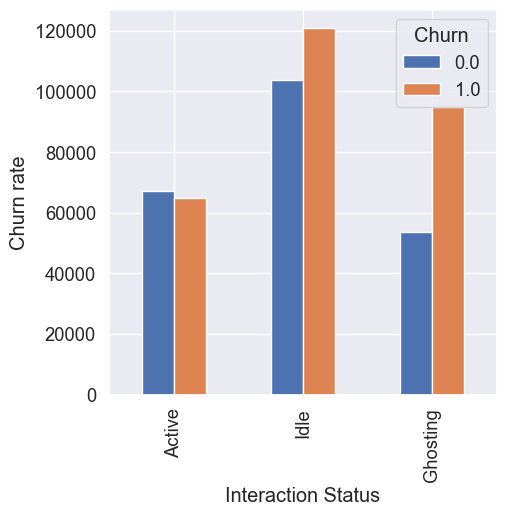

In [39]:
InteractionCat.plot(kind='bar')
plt.ylabel('Churn rate')
plt.xlabel('Interaction Status')
plt.show()

Insights: Last Interaction Effect
---
Active Engagement: Customers who interacted within the last 7 days show the highest retention potential.

The Ghosting Threshold: Once a customer is inactive for more than 20 days, the churn probability spikes to 66.6%.

Behavioral Conclusion: Last Interaction is a "decay" metric; the older the interaction, the weaker the loyalty. The 21-30 day window is the "Point of No Return" for most users.

In [40]:
data['Gender'].value_counts()

Gender
Male      280273
Female    224933
Name: count, dtype: int64

## Feature Engineering


In [41]:
data_cleand = data.dropna(subset=['Age' , 'Gender' , 'Tenure' , 'Usage Frequency',  'Support Calls','Subscription Type', 'Contract Length',  'Total Spend',  'Last Interaction','PaymentDelayCat'])
data_cleand

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeCat,TenureCat,useg Cat,SupportCallsCat,PaymentDelayCat,Monthly Average,InteractionCat
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,25-35,Loyalist,a lot of usege,Multiple Calls,Very_Late,23.897436,Idle
1,3.0,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,1.0,45+,Loyalist,once of use,Multiple Calls,Late,11.367347,Active
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,45+,Long-term,5 times usege,Multiple Calls,Very_Late,13.214286,Active
3,5.0,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,1.0,45+,Loyalist,a lot of usege,Multiple Calls,Late,10.421053,Ghosting
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Late,19.281250,Idle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,35-45,Loyalist,a lot of usege,Multiple Calls,Very_Late,28.696970,Idle
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,35-45,Medium-term,once of use,Multiple Calls,Very_Late,153.833333,Idle
505204,64372.0,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,1.0,18-25,Loyalist,a lot of usege,Multiple Calls,Very_Late,8.384615,Idle
505205,64373.0,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,1.0,45+,Long-term,a lot of usege,Multiple Calls,Very_Late,30.000000,Idle


# Splitting between features and target 

In [42]:
x = data_cleand.drop(['Churn','CustomerID'], axis=1)
y = data_cleand['Churn']

In [43]:
x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,AgeCat,TenureCat,useg Cat,SupportCallsCat,PaymentDelayCat,Monthly Average,InteractionCat
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,25-35,Loyalist,a lot of usege,Multiple Calls,Very_Late,23.897436,Idle
1,65.0,Female,49.0,1.0,6.0,8.0,Basic,Monthly,557.0,6.0,45+,Loyalist,once of use,Multiple Calls,Late,11.367347,Active
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,45+,Long-term,5 times usege,Multiple Calls,Very_Late,13.214286,Active
3,58.0,Male,38.0,21.0,6.0,7.0,Standard,Monthly,396.0,29.0,45+,Loyalist,a lot of usege,Multiple Calls,Late,10.421053,Ghosting
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,18-25,Loyalist,a lot of usege,Multiple Calls,Late,19.281250,Idle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,35-45,Loyalist,a lot of usege,Multiple Calls,Very_Late,28.696970,Idle
505203,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,35-45,Medium-term,once of use,Multiple Calls,Very_Late,153.833333,Idle
505204,25.0,Male,39.0,14.0,6.0,30.0,Premium,Monthly,327.0,20.0,18-25,Loyalist,a lot of usege,Multiple Calls,Very_Late,8.384615,Idle
505205,50.0,Female,18.0,19.0,6.0,22.0,Standard,Monthly,540.0,13.0,45+,Long-term,a lot of usege,Multiple Calls,Very_Late,30.000000,Idle


In [44]:
x_cleand = x.drop(['AgeCat','Payment Delay','TenureCat','useg Cat','SupportCallsCat','Monthly Average','InteractionCat'], axis=1)

In [45]:
X_cleaned_df = pd.DataFrame(x_cleand, columns=['Age','Gender','Tenure',	'Usage Frequency', 'Support Calls', 'Subscription Type', 'Contract Length',	'Total Spend','Last Interaction','PaymentDelayCat'])

In [47]:
X_cleaned_df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Subscription Type,Contract Length,Total Spend,Last Interaction,PaymentDelayCat
0,30.0,Female,39.0,14.0,5.0,Standard,Annual,932.0,17.0,Very_Late
1,65.0,Female,49.0,1.0,6.0,Basic,Monthly,557.0,6.0,Late
2,55.0,Female,14.0,4.0,6.0,Basic,Quarterly,185.0,3.0,Very_Late
3,58.0,Male,38.0,21.0,6.0,Standard,Monthly,396.0,29.0,Late
4,23.0,Male,32.0,20.0,5.0,Basic,Monthly,617.0,20.0,Late
...,...,...,...,...,...,...,...,...,...,...
505202,45.0,Female,33.0,12.0,6.0,Basic,Quarterly,947.0,14.0,Very_Late
505203,37.0,Male,6.0,1.0,5.0,Standard,Annual,923.0,9.0,Very_Late
505204,25.0,Male,39.0,14.0,6.0,Premium,Monthly,327.0,20.0,Very_Late
505205,50.0,Female,18.0,19.0,6.0,Standard,Monthly,540.0,13.0,Very_Late


In [45]:
#importing related libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# Feature Transormation 


In [69]:
NominalFeatures = ['Gender']
OrdinalFeatures = ['Subscription Type','Contract Length','PaymentDelayCat']
NumericalFeatures = ['Age','Tenure','Usage Frequency','Support Calls','Last Interaction','Total Spend']

In [116]:
transformation = ColumnTransformer(
    transformers= [
        ('NominalData' , OneHotEncoder(drop='first'), NominalFeatures),
        ('OrdinalData' , OrdinalEncoder(), OrdinalFeatures),
        ('NumericalData' , StandardScaler(), NumericalFeatures)
    ],
    remainder='passthrough'
)

In [118]:
transformation.fit(x_cleand)

,transformers,"[('NominalData', ...), ('OrdinalData', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [122]:
x_trnasformed = transformation.transform(x_cleand)

In [123]:
x_trnasformed

array([[ 0.        ,  2.        ,  0.        , ...,  0.78142453,
         0.27630165,  1.27318821],
       [ 0.        ,  0.        ,  1.        , ...,  1.2262482 ,
        -1.00138904, -0.25357196],
       [ 0.        ,  0.        ,  2.        , ...,  1.2262482 ,
        -1.34985013, -1.76811805],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  1.2262482 ,
         0.62476274, -1.18998487],
       [ 0.        ,  2.        ,  1.        , ...,  1.2262482 ,
        -0.18831315, -0.32278509],
       [ 0.        ,  2.        ,  1.        , ...,  1.2262482 ,
         0.85707014,  0.31234714]])

In [126]:
feature_names = transformation.get_feature_names_out()
X_transformed_df = pd.DataFrame(x_trnasformed, columns=feature_names)
X_transformed_df

,NominalData__Gender_Male,OrdinalData__Subscription Type,OrdinalData__Contract Length,OrdinalData__PaymentDelayCat,NumericalData__Age,NumericalData__Tenure,NumericalData__Usage Frequency,NumericalData__Support Calls,NumericalData__Last Interaction,NumericalData__Total Spend
0,0.0,2.0,0.0,2.0,-0.766175,0.443750,-0.198360,0.781425,0.276302,1.273188
1,0.0,0.0,1.0,0.0,1.992262,1.023852,-1.706725,1.226248,-1.001389,-0.253572
2,0.0,0.0,2.0,2.0,1.204137,-1.006504,-1.358641,1.226248,-1.349850,-1.768118
3,1.0,2.0,1.0,0.0,1.440574,0.385740,0.613837,1.226248,1.670146,-0.909061
4,1.0,0.0,1.0,0.0,-1.317862,0.037679,0.497809,0.781425,0.624763,-0.009290
...,...,...,...,...,...,...,...,...,...,...
486703,0.0,0.0,2.0,2.0,0.416012,0.095689,-0.430416,1.226248,-0.072159,1.334259
486704,1.0,2.0,0.0,2.0,-0.214488,-1.470585,-1.706725,0.781425,-0.652928,1.236546
486705,1.0,1.0,1.0,2.0,-1.160237,0.443750,-0.198360,1.226248,0.624763,-1.189985
486706,0.0,2.0,1.0,2.0,0.810075,-0.774463,0.381781,1.226248,-0.188313,-0.322785


# Splitting Data to Training and testing data

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_trnasformed, y, test_size=0.2, shuffle=True, random_state=25)

In [77]:
x_train

array([[ 0.        ,  0.        ,  2.        , ..., -0.99787014,
         0.85707014, -1.49468548],
       [ 1.        ,  2.        ,  2.        , ..., -0.55304647,
        -0.88523534,  0.45561832],
       [ 0.        ,  1.        ,  1.        , ...,  1.2262482 ,
         1.43783863,  0.91490849],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.78142453,
         0.62476274,  0.19427769],
       [ 0.        ,  1.        ,  0.        , ...,  1.2262482 ,
         1.20553123, -0.2495006 ],
       [ 0.        ,  2.        ,  0.        , ...,  1.2262482 ,
        -0.88523534,  0.61769918]])

# Polynomial Solution

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [80]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Building The Logistic Regression model

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  ConfusionMatrixDisplay

In [82]:
LRmodel = LogisticRegression(C=1, max_iter=1000)

In [83]:
LRmodel.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Prediction phase 

In [84]:
y_pred = LRmodel.predict(x_test)

# Testing Accuracy 

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78     42864
         1.0       0.83      0.83      0.83     54478

    accuracy                           0.81     97342
   macro avg       0.81      0.81      0.81     97342
weighted avg       0.81      0.81      0.81     97342



--- Confusion Matrix ---


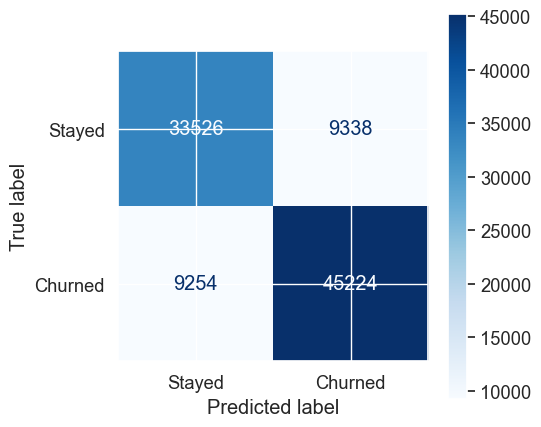

In [86]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.show()

# Logistic Regression model after ploynomial solution 

In [102]:
LRmodelforPloy = LogisticRegression(C=1, max_iter=5000)

In [103]:
LRmodelforPloy.fit(x_train_poly, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [104]:
y_predLRP = LRmodelforPloy.predict(x_test_poly)

In [105]:
print(classification_report(y_test, y_predLRP))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86     42864
         1.0       0.89      0.89      0.89     54478

    accuracy                           0.88     97342
   macro avg       0.88      0.88      0.88     97342
weighted avg       0.88      0.88      0.88     97342



--- Confusion Matrix ---


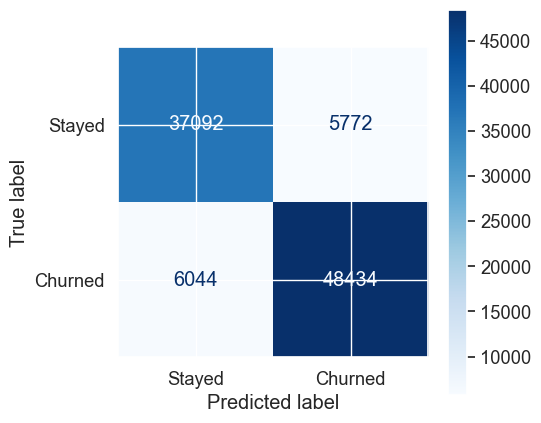

In [106]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_predLRP)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.show()

# Learning Curve

In [108]:
from sklearn.model_selection import learning_curve

In [113]:
train_sizes, train_scores, test_scores = learning_curve(
        LRmodelforPloy, x_train_poly , y_train, cv=5, scoring='accuracy', 
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

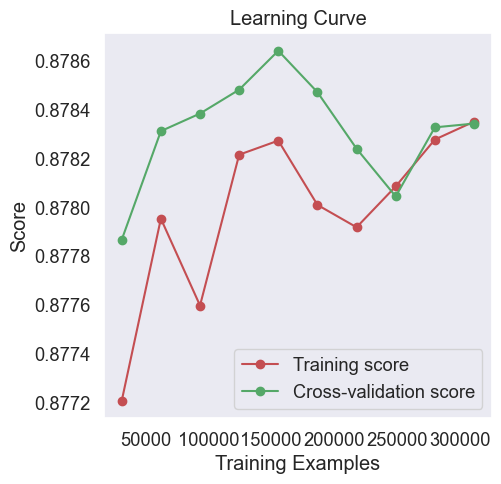

In [114]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Saving Fitted data 

In [115]:
import joblib

In [127]:
joblib.dump(transformation, 'DataTransformatio.joblib')

['DataTransformatio.joblib']

In [129]:
joblib.dump(poly, 'PloynomialTransformation.joblib')

['PloynomialTransformation.joblib']

In [128]:
joblib.dump(LRmodelforPloy, 'PolynomialLogisticRegressionModel.joblib')

['PolynomialLogisticRegressionModel.joblib']

# Building Dtree model 


In [97]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
param_dist = {
    'max_depth': 10,
    'min_samples_split':5,
    'min_samples_leaf':2,
    'class_weight':'balanced',
    'random_state':25
}

In [125]:
DTmodel = DecisionTreeClassifier(**param_dist)

In [126]:
DTmodel.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,25
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [127]:
y_predDT = DTmodel.predict(x_test)

In [128]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     42864
         1.0       0.90      0.97      0.93     54478

    accuracy                           0.92     97342
   macro avg       0.93      0.92      0.92     97342
weighted avg       0.93      0.92      0.92     97342



--- Confusion Matrix ---


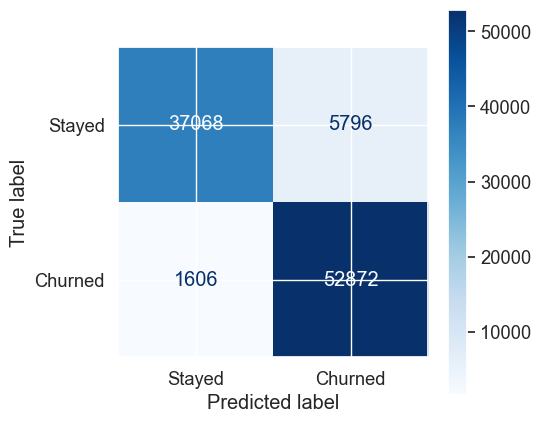

In [123]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_predDT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.show()

# Building Random Forest model 

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
param_dist = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [20, 50]
}

RFmodel = RandomForestClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf = 2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=25
)

RFmodel.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [119]:
y_predRF = RFmodel.predict(x_test)

In [120]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     42864
         1.0       0.90      0.94      0.92     54478

    accuracy                           0.91     97342
   macro avg       0.91      0.90      0.91     97342
weighted avg       0.91      0.91      0.91     97342



--- Confusion Matrix ---


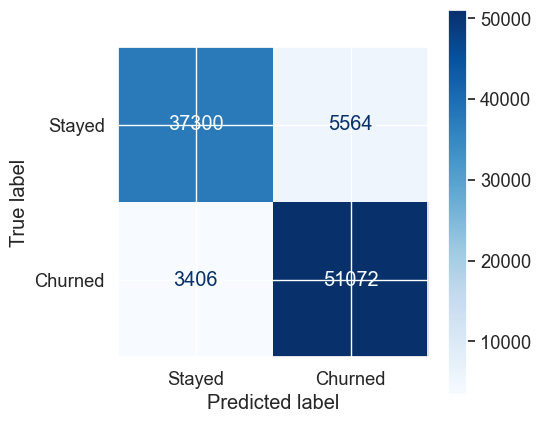

In [122]:
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_predRF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.show()